In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
vehicles = pd.read_csv('./data/vehicles.csv')
vehicles.head()

region  price    year manufacturer                    model  \
0   palm springs   3400  2002.0   volkswagen                jetta gls   
1          salem   6300  2004.0    chevrolet  silverado 2500 crew cab   
2    long island   9997  2011.0       nissan                   xterra   
3       amarillo  21504  2017.0    chevrolet                   malibu   
4  inland empire  28900  2009.0     cadillac                    cts-v   

   condition    cylinders fuel  odometer title_status  ...                vin  \
0  excellent  4 cylinders  gas  100000.0        clean  ...  WVWSK61J62W209823   
1        NaN  8 cylinders  gas  208942.0        clean  ...  1GCHK23U94F144317   
2  excellent          NaN  gas  125666.0        clean  ...  5N1AN0NWXBC502031   
3        NaN  4 cylinders  gas   24218.0        clean  ...                NaN   
4  excellent  8 cylinders  gas   61000.0        clean  ...                NaN   

  drive      size    type paint_color  \
0   NaN       NaN   wagon         NaN   
1   4wd       NaN  pickup       white   
2   NaN       NaN     NaN         NaN   
3   fwd  mid-size   sedan         red   
4   rwd  mid-size   sedan      silver   

                                         description county  state      lat  \
0  This 2002 Volkswagen Jetta GLS Wagon is simply...    NaN     ca  33.7451   
1  We want to let you know up front that Synergiz...    NaN     or  44.9225   
2  Year : 2011   \t\t  Make : NISSAN   \t\t\tMode...    NaN     ny  40.8004   
3  Use this link to see more information on this ...    NaN     tx  35.1773   
4  2009 CTS-V, FAST! Awesome car, super clean, we...    NaN     ca  33.9748   

       long  
0 -116.3520  
1 -123.3200  
2  -73.0058  
3 -101.7940  
4 -117.5580  

[5 rows x 21 columns]

In [3]:
counties = pd.read_csv('./data/counties.csv',
                       sep = ';')
counties.head()

State Abbreviation Postal\ncode
0         Alabama         Ala.           AL
1          Alaska       Alaska           AK
2  American Samoa                        AS
3         Arizona        Ariz.           AZ
4        Arkansas         Ark.           AR

In [4]:
crashes_poverty = pd.read_csv('./data/crashes_poverty.csv',
                              sep = ';')
crashes_poverty.head()

State  Number of Crashes  Poverty
0     Florida               1011     13.7
1   Tennessee                437     15.2
2  New Mexico                344     18.8
3     Alabama                336     16.8
4   Louisiana                271     18.7

In [5]:
vehicles['state'] = vehicles.state.str.upper()

In [6]:
dt_tmp = vehicles.merge(counties, 
                        left_on='state', 
                        right_on='Postal\ncode', 
                        how='left')

In [7]:
data = dt_tmp.merge(crashes_poverty, 
                    left_on='State', 
                    right_on='State', 
                    how='left')

data.drop(['state', 'Postal\ncode', 'Abbreviation'], 
          axis = 1,
          inplace = True)

In [8]:
df = data.copy()

In [9]:
df

region  price    year manufacturer  \
0               palm springs   3400  2002.0   volkswagen   
1                      salem   6300  2004.0    chevrolet   
2                long island   9997  2011.0       nissan   
3                   amarillo  21504  2017.0    chevrolet   
4              inland empire  28900  2009.0     cadillac   
...                      ...    ...     ...          ...   
26983     mcallen / edinburg   7200  2007.0    chevrolet   
26984             western IL      0  2019.0         ford   
26985  ft myers / SW florida  10000  2002.0    chevrolet   
26986                 tucson   3800  2005.0        dodge   
26987            los angeles  21800  2013.0          bmw   

                              model  condition    cylinders fuel  odometer  \
0                         jetta gls  excellent  4 cylinders  gas  100000.0   
1           silverado 2500 crew cab        NaN  8 cylinders  gas  208942.0   
2                            xterra  excellent          NaN  gas  125666.0   
3                            malibu        NaN  4 cylinders  gas   24218.0   
4                             cts-v  excellent  8 cylinders  gas   61000.0   
...                             ...        ...          ...  ...       ...   
26983                      tahoe lt       fair  8 cylinders  gas  210000.0   
26984                      explorer        NaN          NaN  gas   36863.0   
26985                      corvette        NaN          NaN  gas       NaN   
26986                 grand caravan        NaN          NaN  gas       NaN   
26987  3 series 328i convertible 2d       good          NaN  gas   18124.0   

      title_status  ...       size    type paint_color  \
0            clean  ...        NaN   wagon         NaN   
1            clean  ...        NaN  pickup       white   
2            clean  ...        NaN     NaN         NaN   
3            clean  ...   mid-size   sedan         red   
4            clean  ...   mid-size   sedan      silver   
...            ...  ...        ...     ...         ...   
26983        clean  ...  full-size     SUV        grey   
26984        clean  ...        NaN     NaN      silver   
26985        clean  ...        NaN     NaN         NaN   
26986        clean  ...        NaN     NaN         NaN   
26987        clean  ...        NaN   other         NaN   

                                             description county      lat  \
0      This 2002 Volkswagen Jetta GLS Wagon is simply...    NaN  33.7451   
1      We want to let you know up front that Synergiz...    NaN  44.9225   
2      Year : 2011   \t\t  Make : NISSAN   \t\t\tMode...    NaN  40.8004   
3      Use this link to see more information on this ...    NaN  35.1773   
4      2009 CTS-V, FAST! Awesome car, super clean, we...    NaN  33.9748   
...                                                  ...    ...      ...   
26983  Selling a 2007 chevy tahoe lt 5.3 lt V8 210,00...    NaN  26.1694   
26984  Blackwell Motors address:    1001 Highway K Bo...    NaN  37.9206   
26985  Good condition, reply to post to see, nights a...    NaN  26.2925   
26986  2005 Dodge grand caravan, $3,800, title clean,...    NaN  32.1422   
26987  Welcome to Carvana—the new way to buy a car (e...    NaN  33.9500   

           long       State  Number of Crashes  Poverty  
0     -116.3520  California              116.0     12.8  
1     -123.3200      Oregon              125.0     12.5  
2      -73.0058    New York              156.0     13.7  
3     -101.7940       Texas              268.0     14.9  
4     -117.5580  California              116.0     12.8  
...         ...         ...                ...      ...  
26983  -97.9887       Texas              268.0     14.9  
26984  -90.5391    Illinois              100.0     12.1  
26985  -81.5947     Florida             1011.0     13.7  
26986 -111.0510     Arizona              249.0     14.1  
26987 -118.1200  California              116.0     12.8  

[26988 rows x 23 columns]

# Null Data 

In [10]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'description', 'county', 'lat',
       'long', 'State', 'Number of Crashes', 'Poverty'],
      dtype='object')

In [11]:
len(df.columns)

23

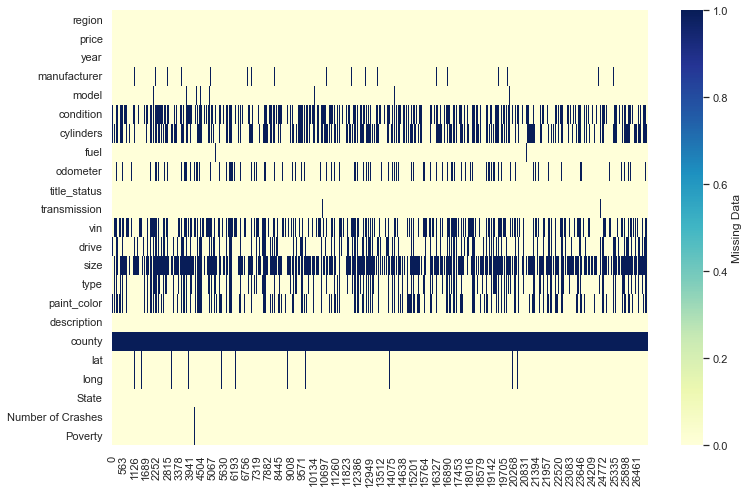

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26988 entries, 0 to 26987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             26988 non-null  object 
 1   price              26988 non-null  int64  
 2   year               26938 non-null  float64
 3   manufacturer       25794 non-null  object 
 4   model              26565 non-null  object 
 5   condition          15344 non-null  object 
 6   cylinders          15682 non-null  object 
 7   fuel               26820 non-null  object 
 8   odometer           21993 non-null  float64
 9   title_status       26851 non-null  object 
 10  transmission       26752 non-null  object 
 11  vin                16116 non-null  object 
 12  drive              18992 non-null  object 
 13  size               8346 non-null   object 
 14  type               19827 non-null  object 
 15  paint_color        18198 non-null  object 
 16  description        269

# VIN (Vehicle Identification Number) & County

In [14]:
df.drop_duplicates(subset=['vin'], inplace=True)

In [15]:
df.drop(columns=['vin', 'county'])

region  price    year manufacturer  \
0        palm springs   3400  2002.0   volkswagen   
1               salem   6300  2004.0    chevrolet   
2         long island   9997  2011.0       nissan   
3            amarillo  21504  2017.0    chevrolet   
8      seattle-tacoma   8800  2012.0         ford   
...               ...    ...     ...          ...   
26979           boise  27995  2015.0         jeep   
26981    rhode island   7995  2009.0       toyota   
26982  ventura county   4995  2006.0   volkswagen   
26984      western IL      0  2019.0         ford   
26987     los angeles  21800  2013.0          bmw   

                              model  condition    cylinders    fuel  odometer  \
0                         jetta gls  excellent  4 cylinders     gas  100000.0   
1           silverado 2500 crew cab        NaN  8 cylinders     gas  208942.0   
2                            xterra  excellent          NaN     gas  125666.0   
3                            malibu        NaN  4 cylinders     gas   24218.0   
8                             focus        NaN          NaN     gas   54328.0   
...                             ...        ...          ...     ...       ...   
26979     wrangler unlimited sahara   like new  6 cylinders     gas   87960.0   
26981                          rav4  excellent          NaN     gas  162509.0   
26982                         jetta        NaN          NaN  diesel  132212.0   
26984                      explorer        NaN          NaN     gas   36863.0   
26987  3 series 328i convertible 2d       good          NaN     gas   18124.0   

      title_status  ... drive      size    type paint_color  \
0            clean  ...   NaN       NaN   wagon         NaN   
1            clean  ...   4wd       NaN  pickup       white   
2            clean  ...   NaN       NaN     NaN         NaN   
3            clean  ...   fwd  mid-size   sedan         red   
8            clean  ...   NaN   compact   sedan         NaN   
...            ...  ...   ...       ...     ...         ...   
26979        clean  ...   4wd       NaN     SUV        blue   
26981        clean  ...   4wd       NaN     SUV         NaN   
26982        clean  ...   NaN   compact   sedan         NaN   
26984        clean  ...   fwd       NaN     NaN      silver   
26987        clean  ...   rwd       NaN   other         NaN   

                                             description      lat      long  \
0      This 2002 Volkswagen Jetta GLS Wagon is simply...  33.7451 -116.3520   
1      We want to let you know up front that Synergiz...  44.9225 -123.3200   
2      Year : 2011   \t\t  Make : NISSAN   \t\t\tMode...  40.8004  -73.0058   
3      Use this link to see more information on this ...  35.1773 -101.7940   
8      2012 Ford Focus SEL     Offered by: First Nati...  47.7227 -122.3440   
...                                                  ...      ...       ...   
26979  2015 Jeep Wrangler Unlimited Sahara SUVExterio...  43.6195 -116.3060   
26981  2009 *** Toyota RAV4 Limited 4x4 4dr SUV V6 SU...  41.6667  -70.3010   
26982  2006 Volkswagen Jetta TDI     Offered by: Rega...  34.1835 -118.9080   
26984  Blackwell Motors address:    1001 Highway K Bo...  37.9206  -90.5391   
26987  Welcome to Carvana—the new way to buy a car (e...  33.9500 -118.1200   

              State Number of Crashes  Poverty  
0        California             116.0     12.8  
1            Oregon             125.0     12.5  
2          New York             156.0     13.7  
3             Texas             268.0     14.9  
8        Washington             245.0     10.3  
...             ...               ...      ...  
26979         Idaho             142.0     11.7  
26981  Rhode Island              39.0     12.8  
26982    California             116.0     12.8  
26984      Illinois             100.0     12.1  
26987    California             116.0     12.8  

[14810 rows x 21 columns]

# Response Variable

# Price

C:\Users\JuanFe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


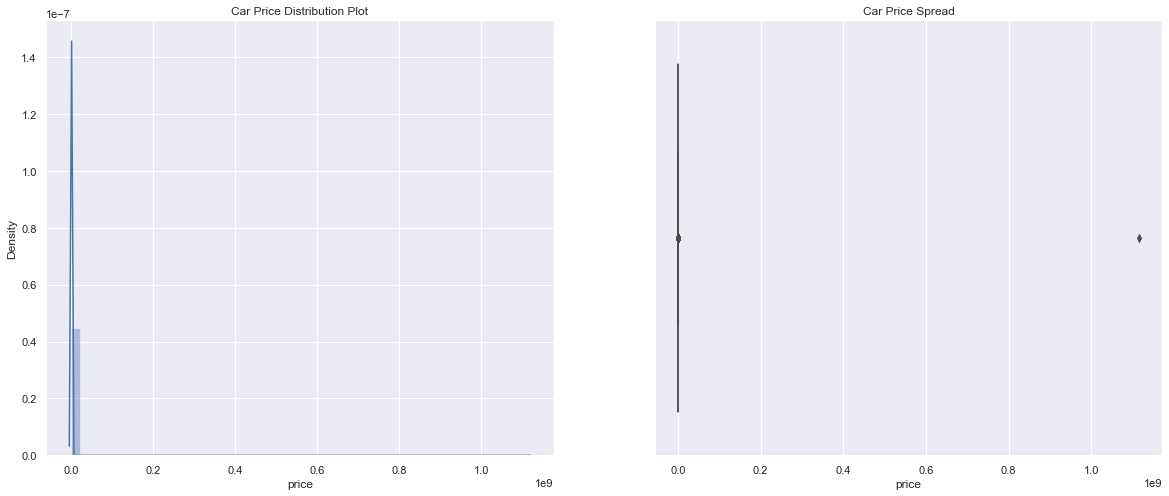

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['price'], kde=True)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=df['price'])

plt.show()

In [17]:
df = df[df['price'] < df['price'].quantile(.95)]
df = df[df['price'] > 50]

C:\Users\JuanFe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


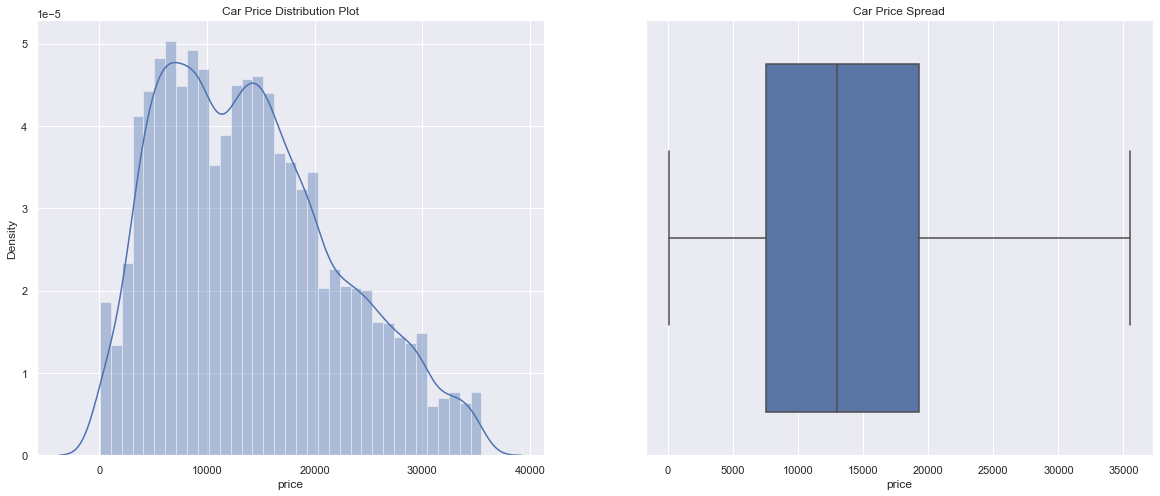

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=df['price'])

plt.show()

# Odometer

C:\Users\JuanFe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


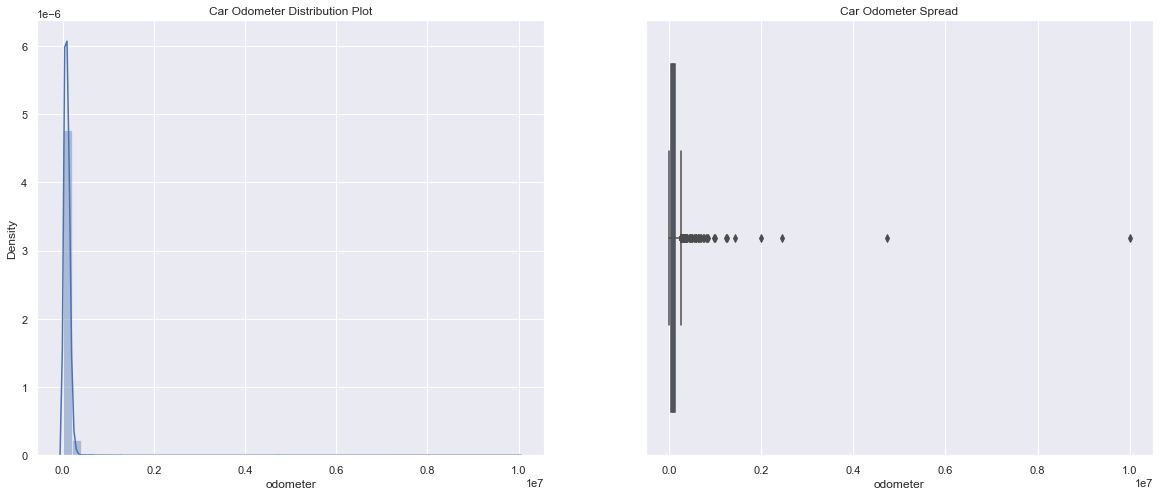

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Odometer Distribution Plot')
sns.distplot(df['odometer'])

plt.subplot(1,2,2)
plt.title('Car Odometer Spread')
sns.boxplot(x=df['odometer'])

plt.show()

In [20]:
df = df[df.odometer < df.odometer.quantile(.95)]

C:\Users\JuanFe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


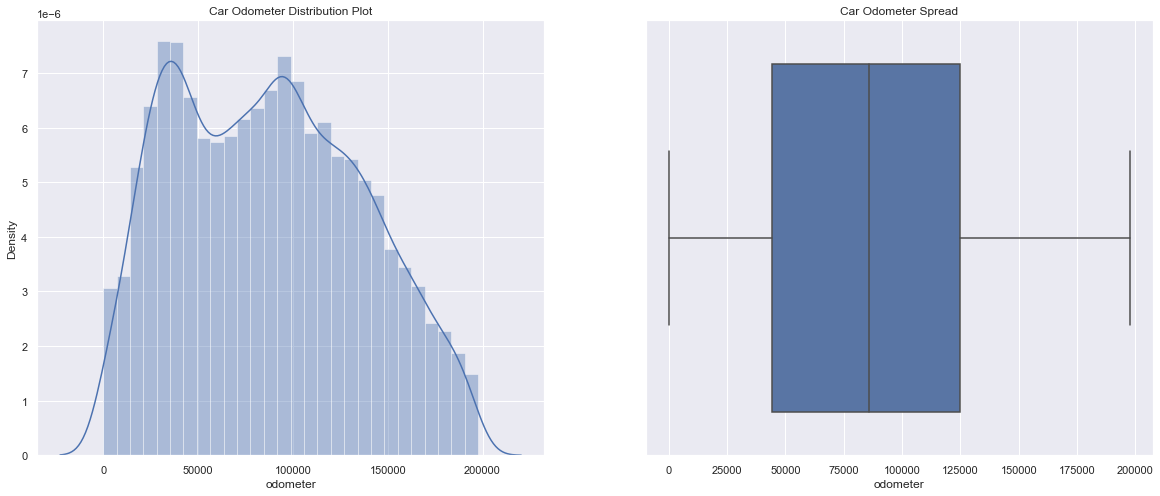

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Odometer Distribution Plot')
sns.distplot(df['odometer'])

plt.subplot(1,2,2)
plt.title('Car Odometer Spread')
sns.boxplot(x=df['odometer'])

plt.show()

# Year

C:\Users\JuanFe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


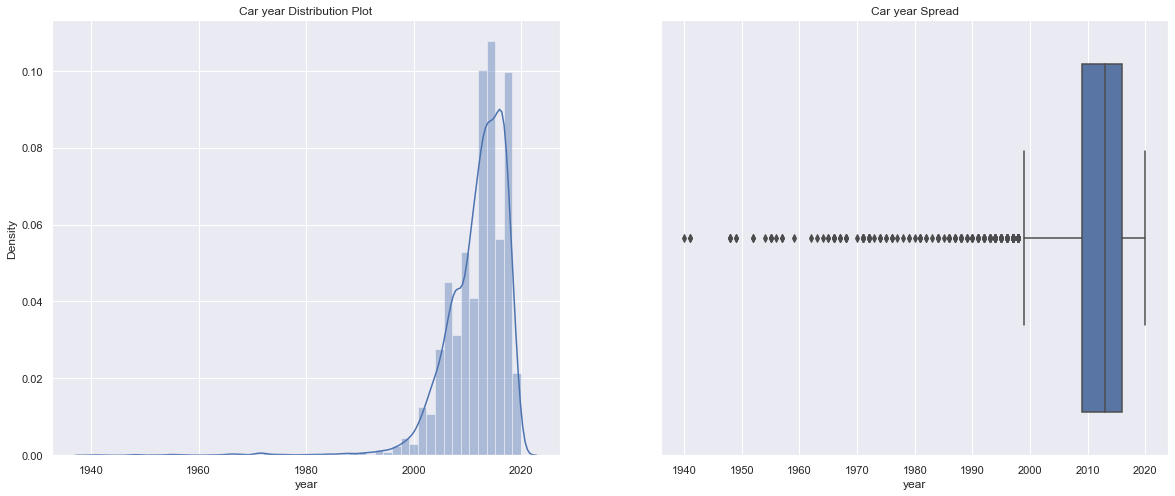

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car year Distribution Plot')
sns.distplot(df['year'])

plt.subplot(1,2,2)
plt.title('Car year Spread')
sns.boxplot(x=df['year'])

plt.show()

In [23]:
df = df[df.year > df.year.quantile(.05)]

C:\Users\JuanFe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


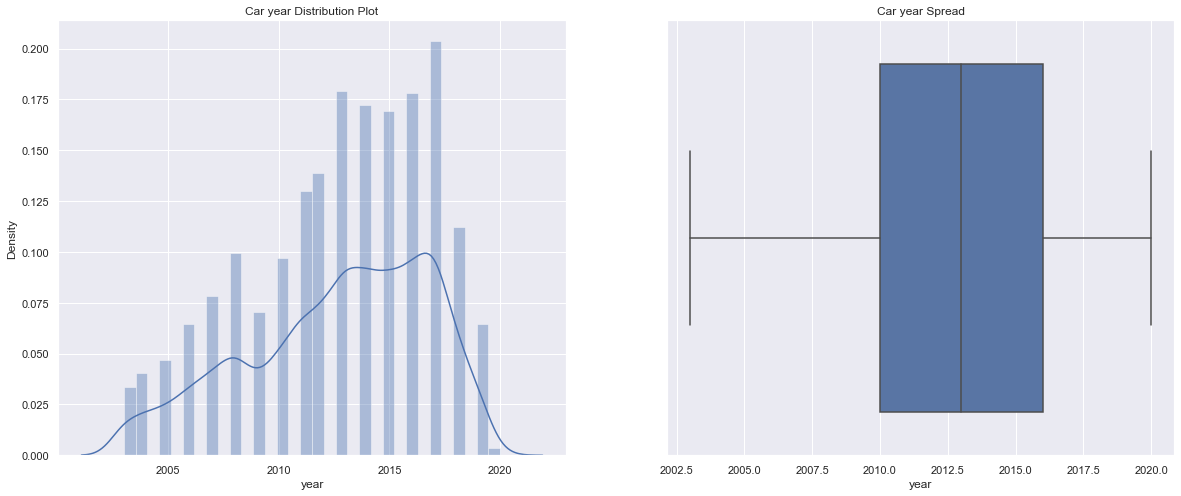

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car year Distribution Plot')
sns.distplot(df['year'])

plt.subplot(1,2,2)
plt.title('Car year Spread')
sns.boxplot(x=df['year'])

plt.show()

In [25]:
len(df)

10795

In [26]:
(len(df)/len(data))*100

39.999258929894765

# Cylinders

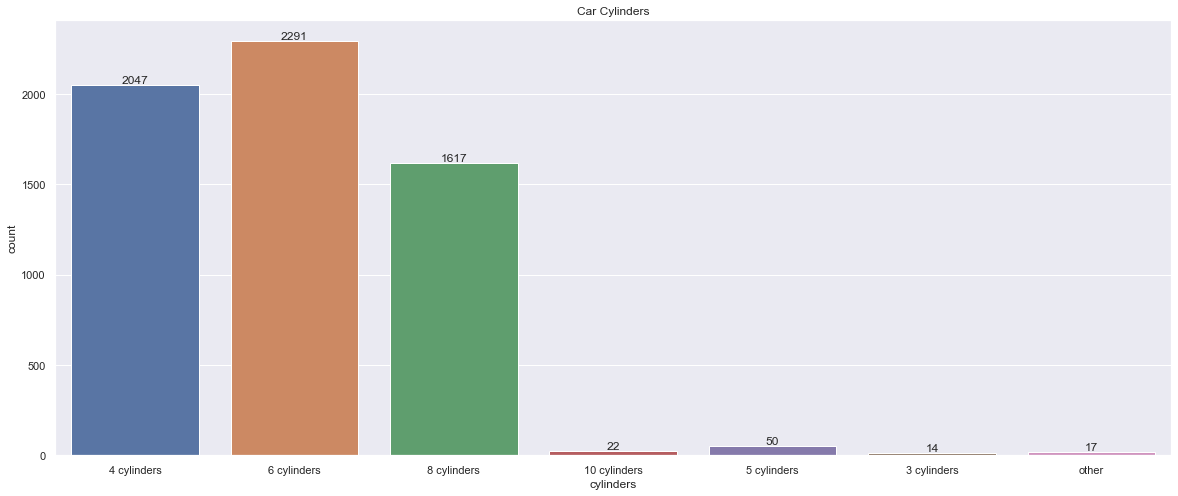

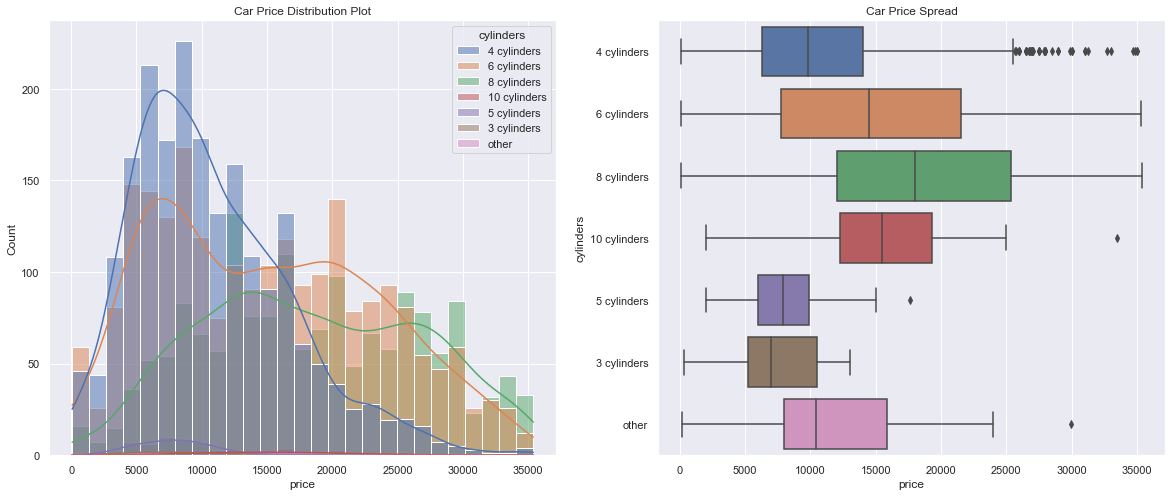

In [27]:
plt.figure(figsize=(20,8))
plt.title('Car Cylinders')
ax = sns.countplot(data=df, x="cylinders")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(data= df, x='price', hue='cylinders', kde=True)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(data= df, x='price', y= 'cylinders')

plt.show()

# Region

In [28]:
"""plt.figure(figsize=(20,8))
plt.title('Car Cylinders')
ax = sns.countplot(data=df, x="region")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(data= df, x='price', hue='region', kde=True)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(data= df, x='price', y= 'region')

plt.show()
"""

df['region'].value_counts()

ventura county      215
stockton            197
sacramento          181
SF bay area         173
bakersfield         169
                   ... 
imperial county       1
eastern kentucky      1
texarkana             1
chautauqua            1
bismarck              1
Name: region, Length: 357, dtype: int64

# Manufacturer

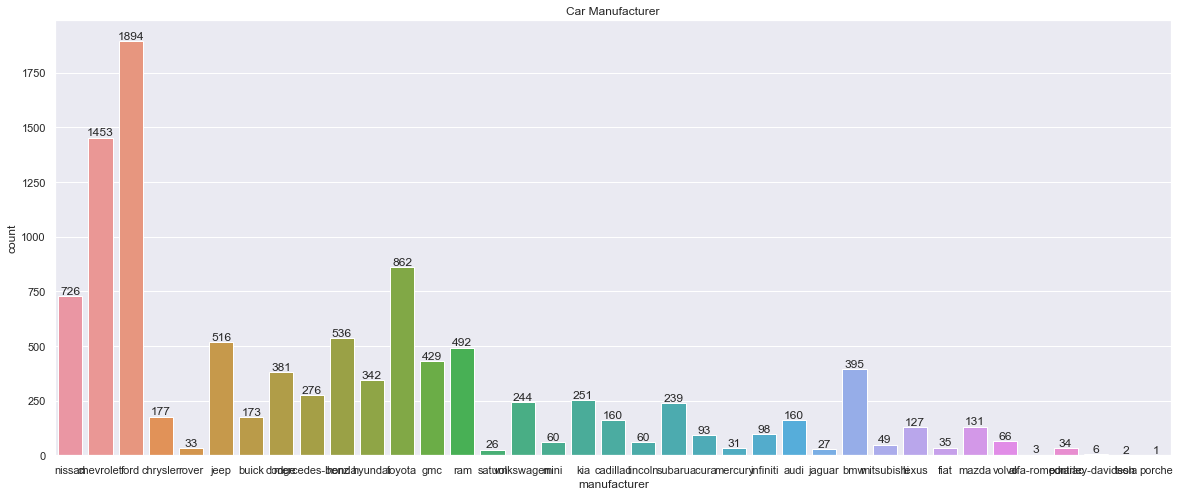

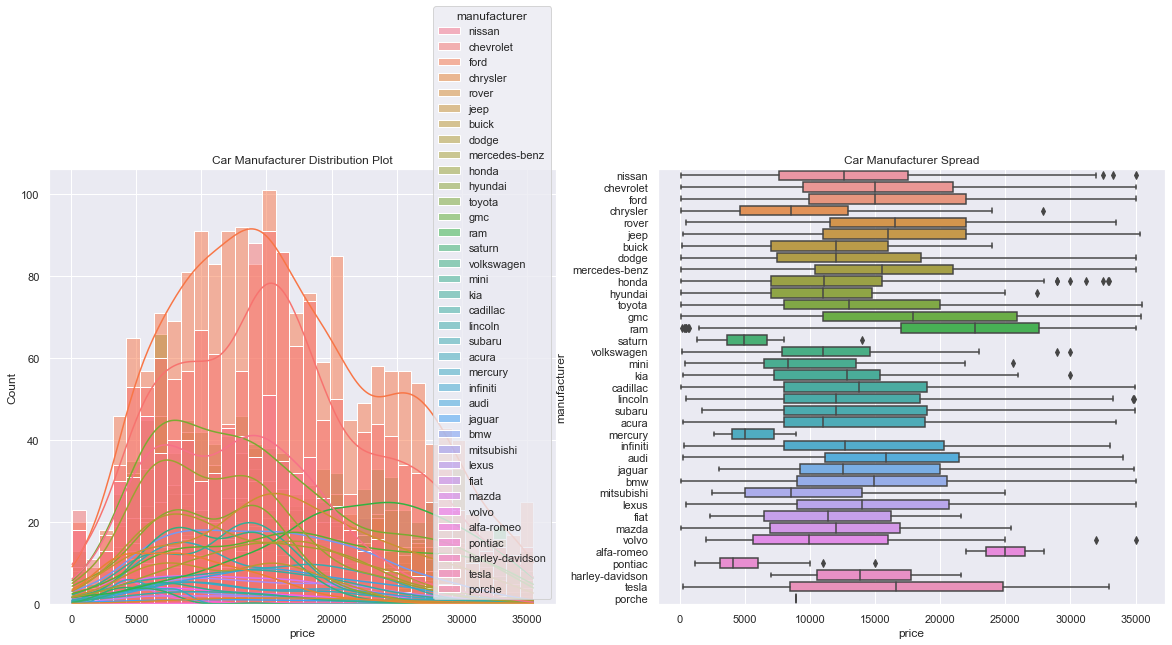

In [29]:
plt.figure(figsize=(20,8))
plt.title('Car Manufacturer')
ax = sns.countplot(data=df, x="manufacturer")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Manufacturer Distribution Plot')
sns.histplot(data= df, x='price', hue='manufacturer', kde=True)

plt.subplot(1,2,2)
plt.title('Car Manufacturer Spread')
sns.boxplot(data= df, x='price', y= 'manufacturer')

plt.show()

In [30]:
df['manufacturer'].value_counts()

ford               1894
chevrolet          1453
toyota              862
nissan              726
honda               536
jeep                516
ram                 492
gmc                 429
bmw                 395
dodge               381
hyundai             342
mercedes-benz       276
kia                 251
volkswagen          244
subaru              239
chrysler            177
buick               173
audi                160
cadillac            160
mazda               131
lexus               127
infiniti             98
acura                93
volvo                66
mini                 60
lincoln              60
mitsubishi           49
fiat                 35
pontiac              34
rover                33
mercury              31
jaguar               27
saturn               26
harley-davidson       6
alfa-romeo            3
tesla                 2
porche                1
Name: manufacturer, dtype: int64

In [31]:
len(df['manufacturer'].value_counts())

37

# Model

In [32]:
"""plt.figure(figsize=(20,8))
plt.title('Car Cylinders')
ax = sns.countplot(data=df, x="model")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(data= df, x='price', hue='model', kde=True)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(data= df, x='price', y= 'model')

plt.show()
"""

df['model'].value_counts()

f-150                     275
1500                      147
silverado 1500            140
escape                     90
altima                     87
                         ... 
f150 regular cab            1
equinox lt awd gas suv      1
sienna minivan 4d           1
124 spider lusso            1
xt5                         1
Name: model, Length: 3175, dtype: int64

# Condition

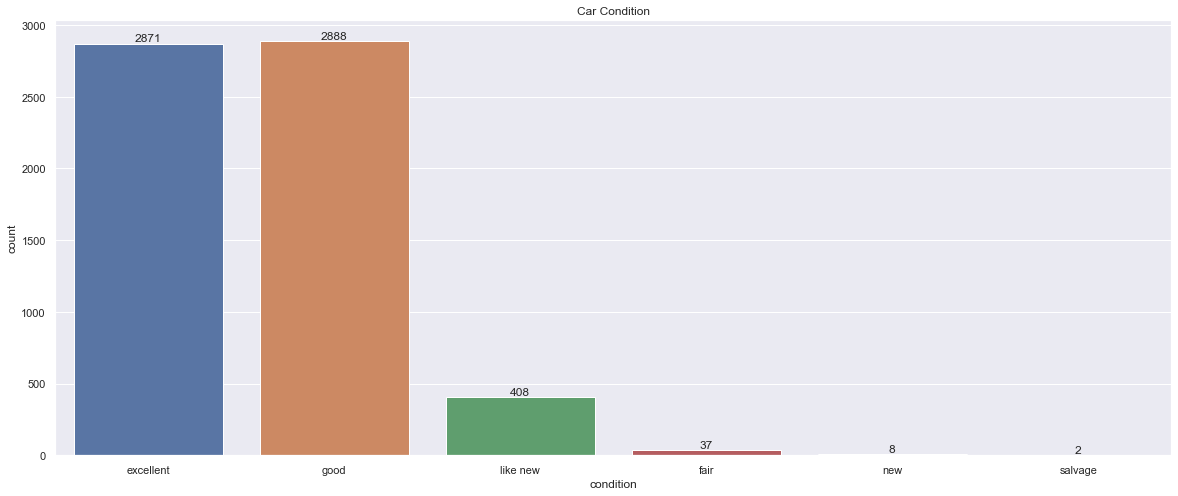

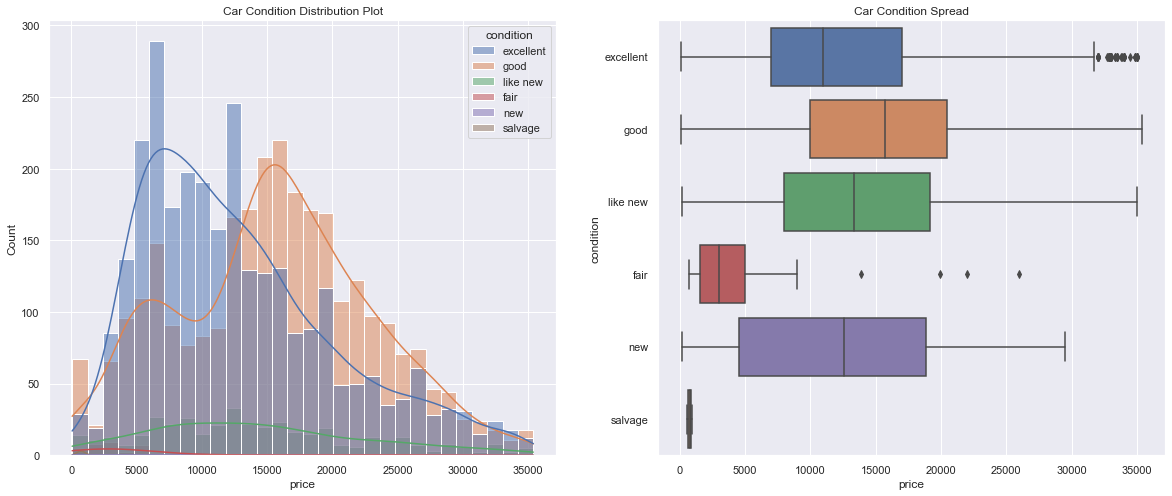

In [33]:
plt.figure(figsize=(20,8))
plt.title('Car Condition')
ax = sns.countplot(data=df, x="condition")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Condition Distribution Plot')
sns.histplot(data= df, x='price', hue='condition', kde=True)

plt.subplot(1,2,2)
plt.title('Car Condition Spread')
sns.boxplot(data= df, x='price', y= 'condition')

plt.show()

In [34]:
df['condition'].value_counts()

good         2888
excellent    2871
like new      408
fair           37
new             8
salvage         2
Name: condition, dtype: int64

In [35]:
df['condition'] = df['condition'].replace({'like new':'like new - new', 'new':'like new - new',
                                           'fair': 'fair - salvage', 'salvage' : 'fair - salvage'})

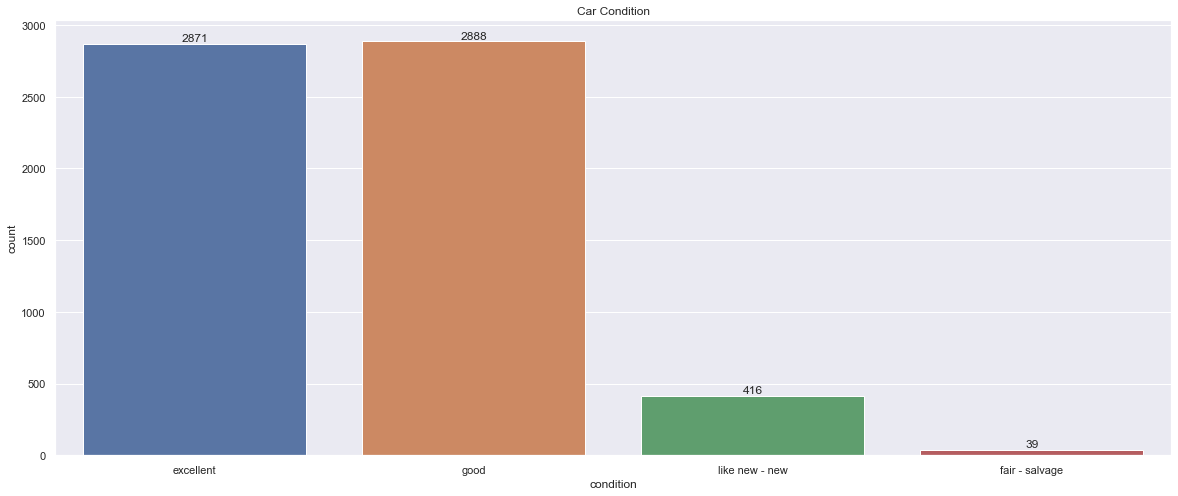

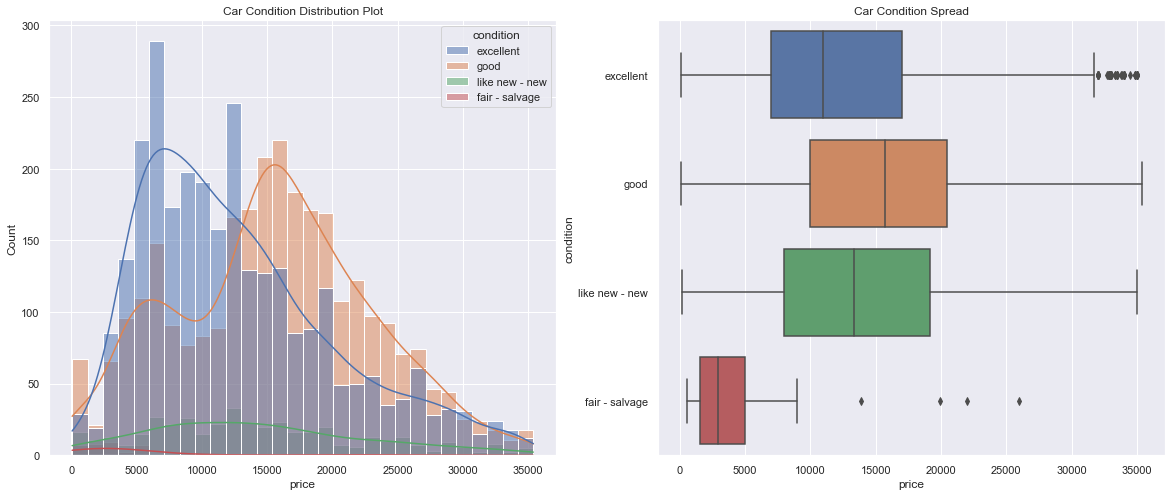

In [36]:
plt.figure(figsize=(20,8))
plt.title('Car Condition')
ax = sns.countplot(data=df, x="condition")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Condition Distribution Plot')
sns.histplot(data= df, x='price', hue='condition', kde=True)

plt.subplot(1,2,2)
plt.title('Car Condition Spread')
sns.boxplot(data= df, x='price', y= 'condition')

plt.show()

# Fuel

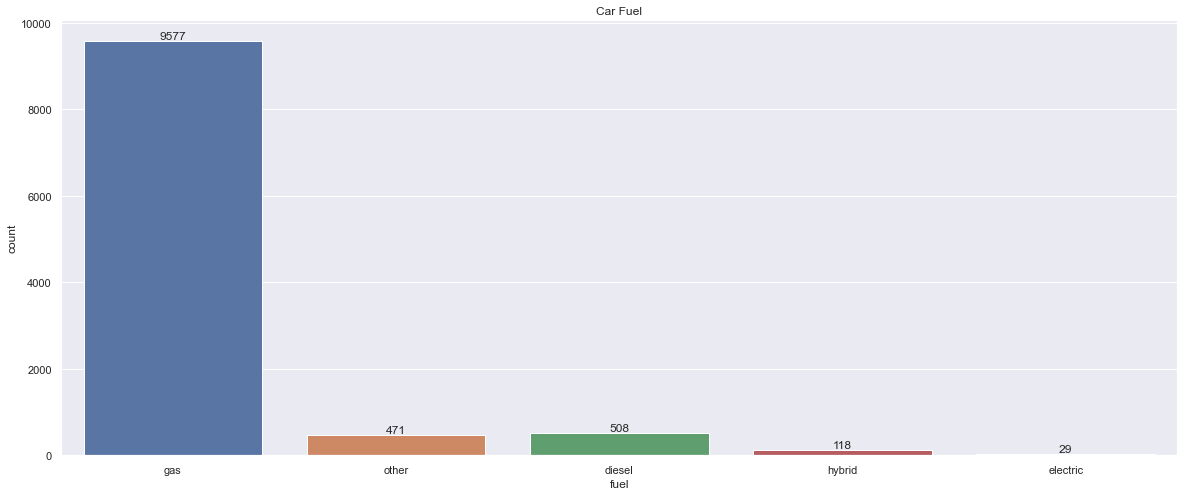

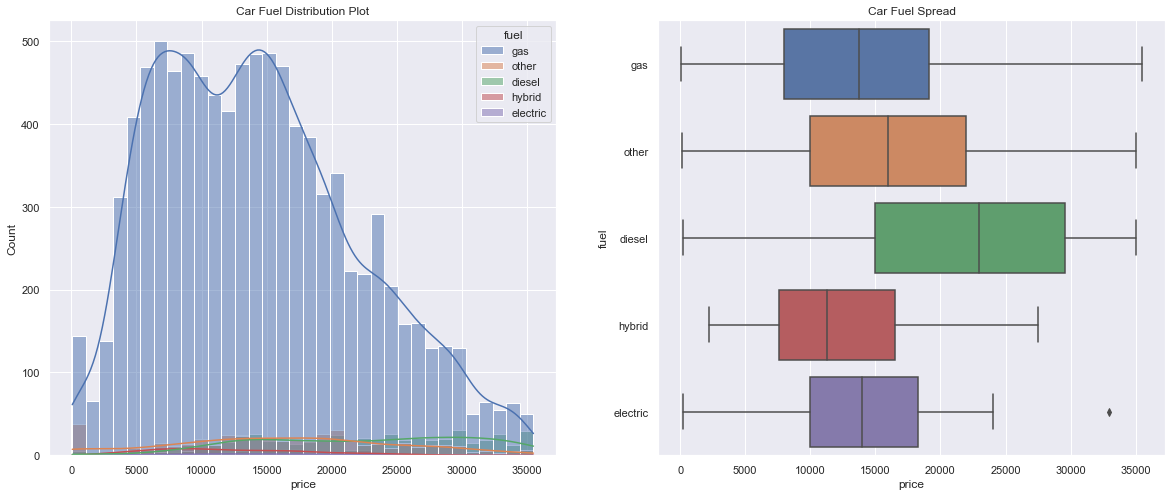

In [37]:
plt.figure(figsize=(20,8))
plt.title('Car Fuel')
ax = sns.countplot(data=df, x="fuel")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Fuel Distribution Plot')
sns.histplot(data= df, x='price', hue='fuel', kde=True)

plt.subplot(1,2,2)
plt.title('Car Fuel Spread')
sns.boxplot(data= df, x='price', y= 'fuel')

plt.show()

# Title Status

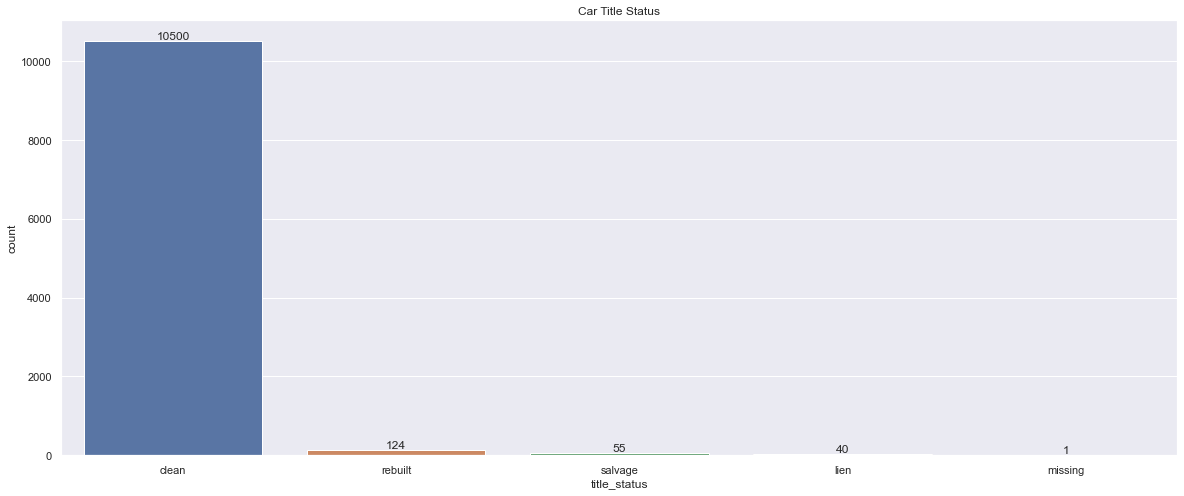

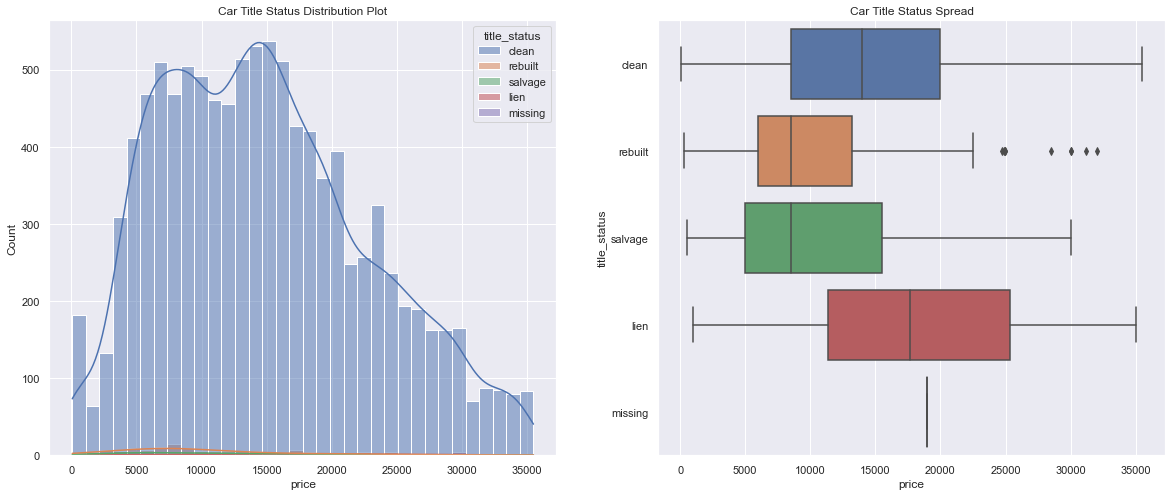

In [38]:
plt.figure(figsize=(20,8))
plt.title('Car Title Status')
ax = sns.countplot(data=df, x="title_status")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Title Status Distribution Plot')
sns.histplot(data= df, x='price', hue='title_status', kde=True)

plt.subplot(1,2,2)
plt.title('Car Title Status Spread')
sns.boxplot(data= df, x='price', y= 'title_status')

plt.show()

In [39]:
df.title_status.value_counts()

clean      10500
rebuilt      124
salvage       55
lien          40
missing        1
Name: title_status, dtype: int64

# Transmission

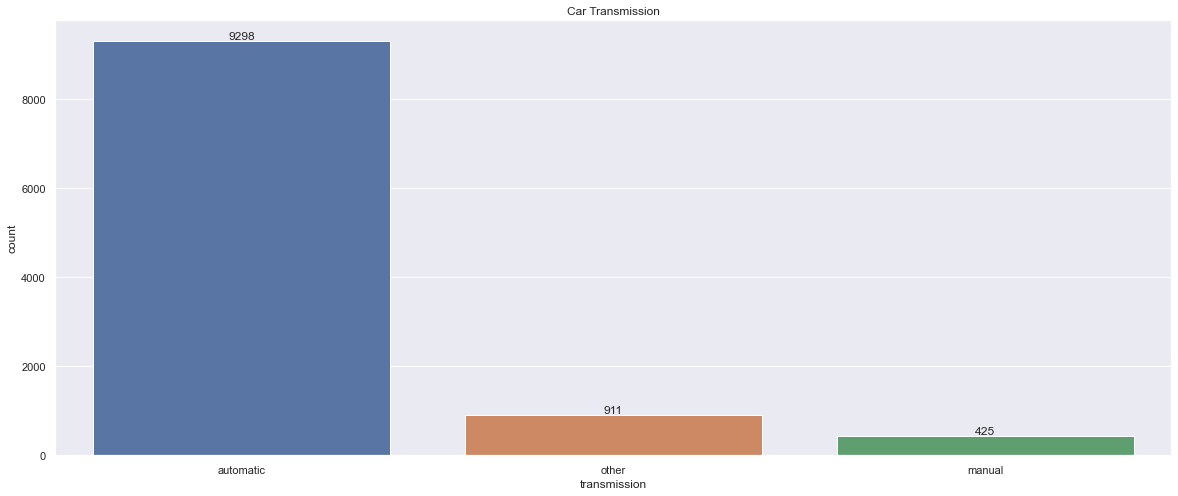

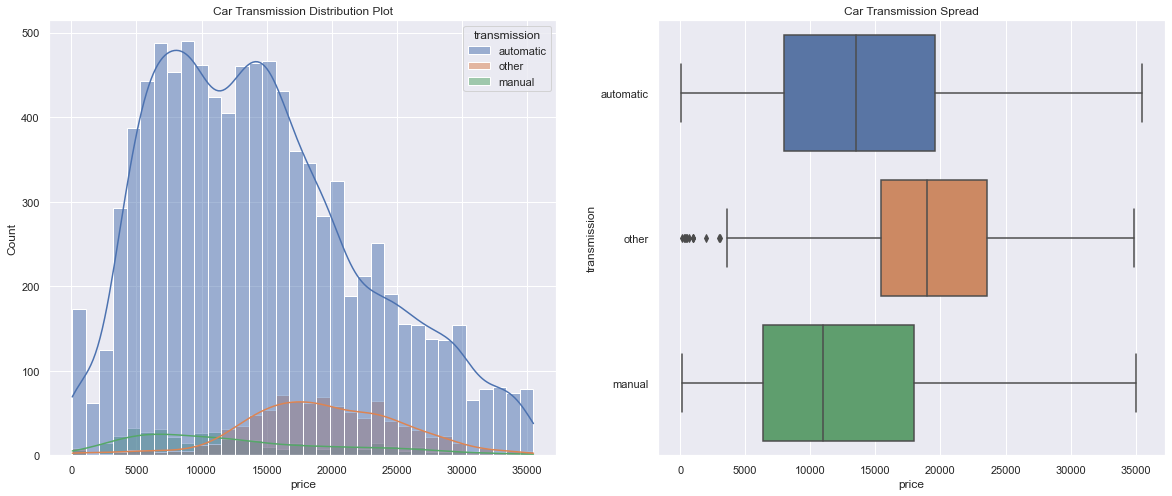

In [40]:
plt.figure(figsize=(20,8))
plt.title('Car Transmission')
ax = sns.countplot(data=df, x="transmission")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Transmission Distribution Plot')
sns.histplot(data= df, x='price', hue='transmission', kde=True)

plt.subplot(1,2,2)
plt.title('Car Transmission Spread')
sns.boxplot(data= df, x='price', y= 'transmission')

plt.show()

# Drive

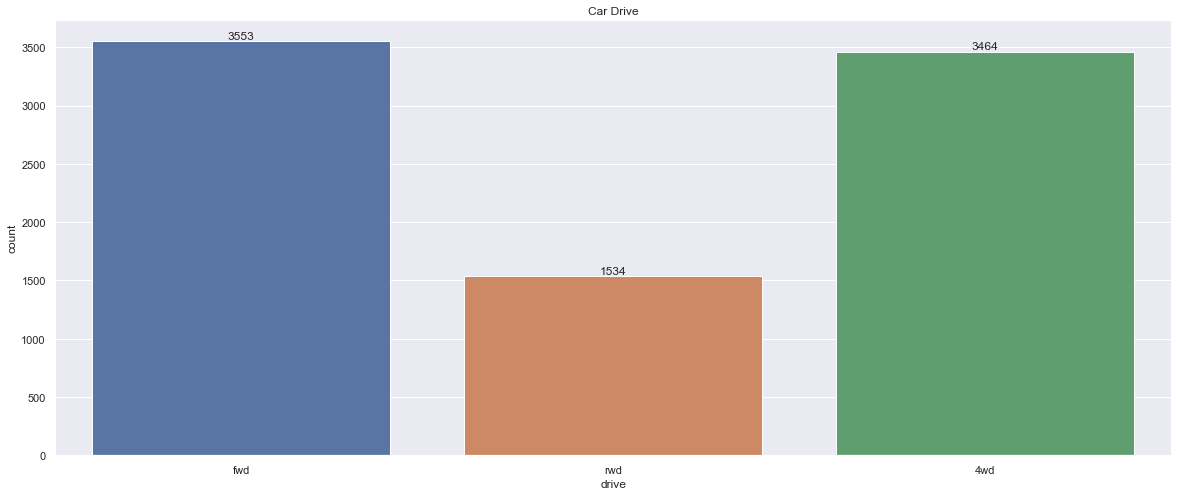

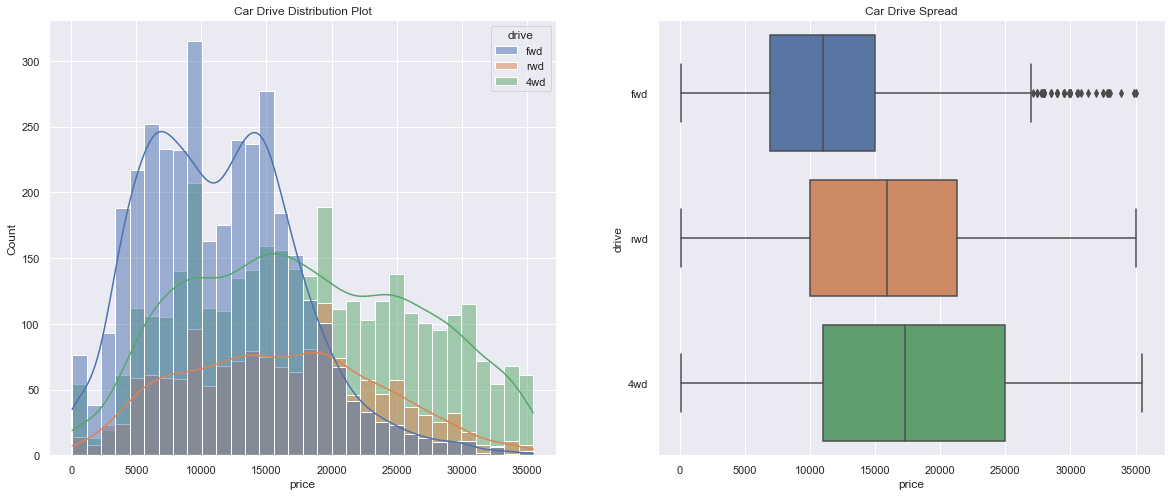

In [41]:
plt.figure(figsize=(20,8))
plt.title('Car Drive')
ax = sns.countplot(data=df, x="drive")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Drive Distribution Plot')
sns.histplot(data= df, x='price', hue='drive', kde=True)

plt.subplot(1,2,2)
plt.title('Car Drive Spread')
sns.boxplot(data= df, x='price', y= 'drive')

plt.show()

# Type

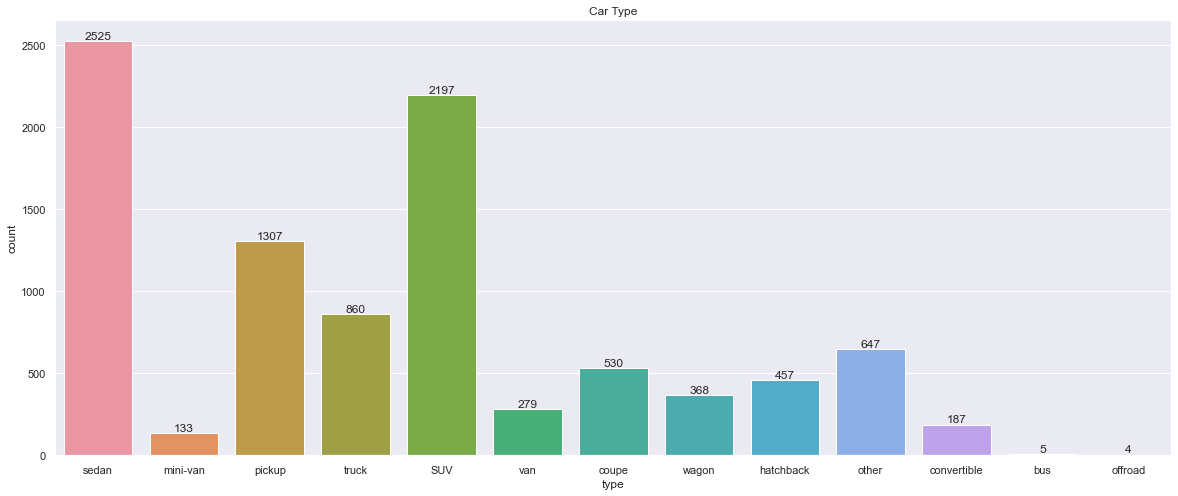

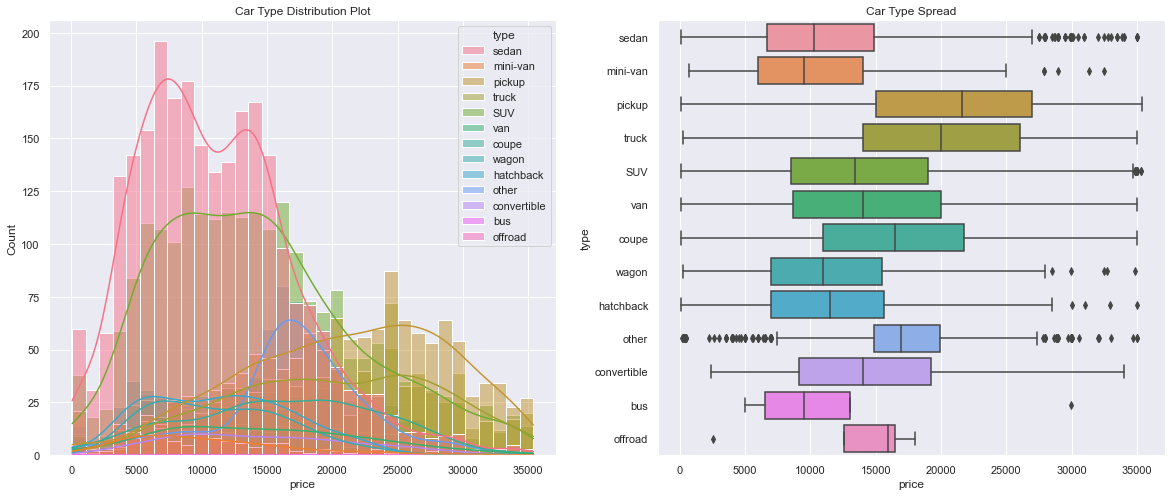

In [42]:
plt.figure(figsize=(20,8))
plt.title('Car Type')
ax = sns.countplot(data=df, x="type")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Type Distribution Plot')
sns.histplot(data= df, x='price', hue='type', kde=True)

plt.subplot(1,2,2)
plt.title('Car Type Spread')
sns.boxplot(data= df, x='price', y= 'type')

plt.show()

In [43]:
df['type'].value_counts()

sedan          2525
SUV            2197
pickup         1307
truck           860
other           647
coupe           530
hatchback       457
wagon           368
van             279
convertible     187
mini-van        133
bus               5
offroad           4
Name: type, dtype: int64

In [44]:
df['type'] = df['type'].replace({'bus':'other', 'offroad':'other'})

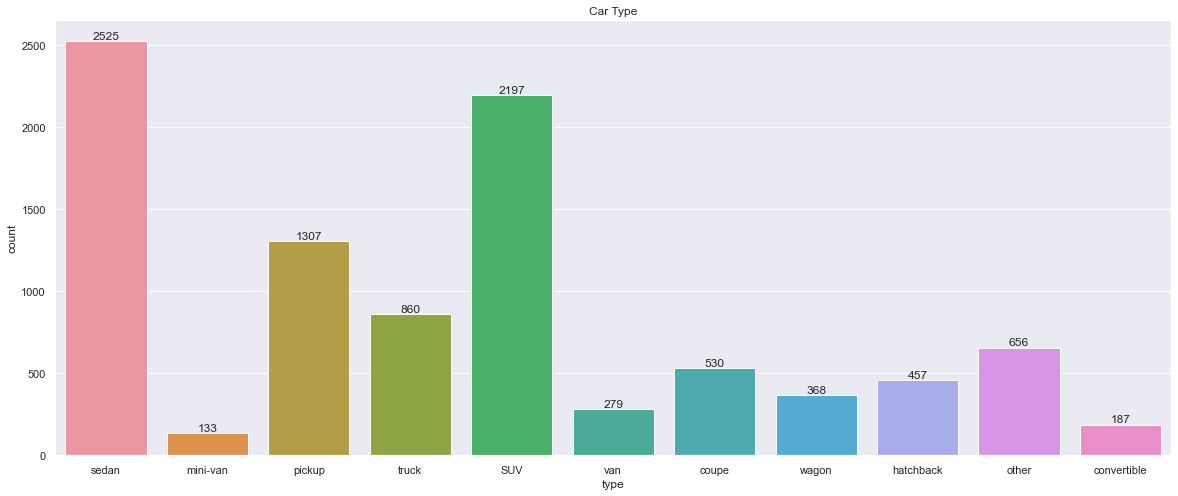

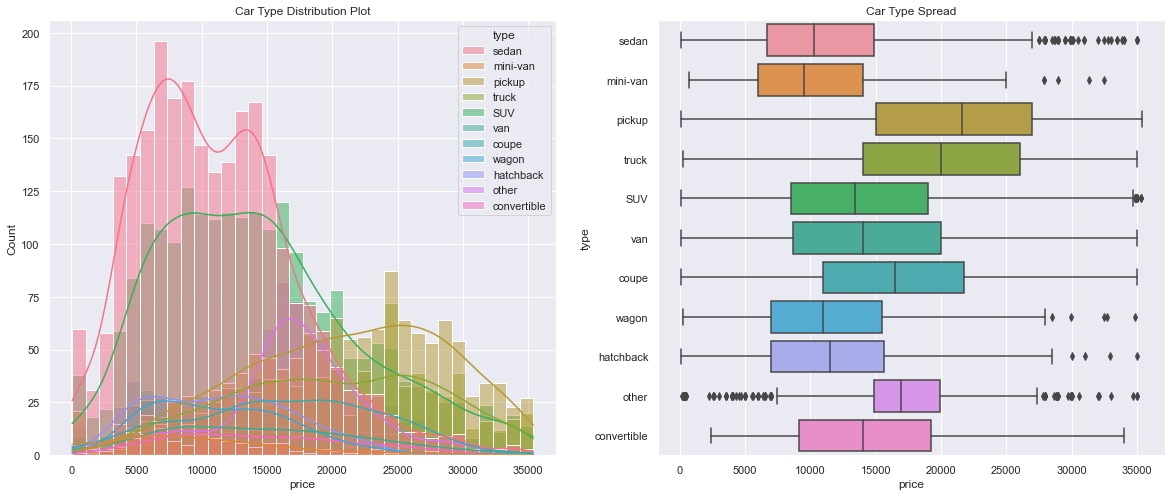

In [45]:
plt.figure(figsize=(20,8))
plt.title('Car Type')
ax = sns.countplot(data=df, x="type")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Type Distribution Plot')
sns.histplot(data= df, x='price', hue='type', kde=True)

plt.subplot(1,2,2)
plt.title('Car Type Spread')
sns.boxplot(data= df, x='price', y= 'type')

plt.show()

# Paint Color

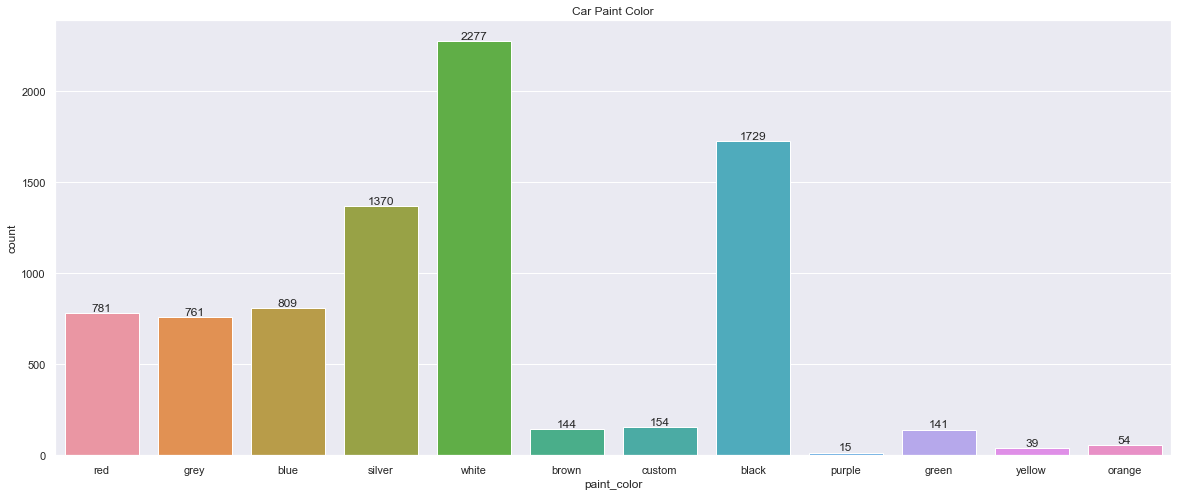

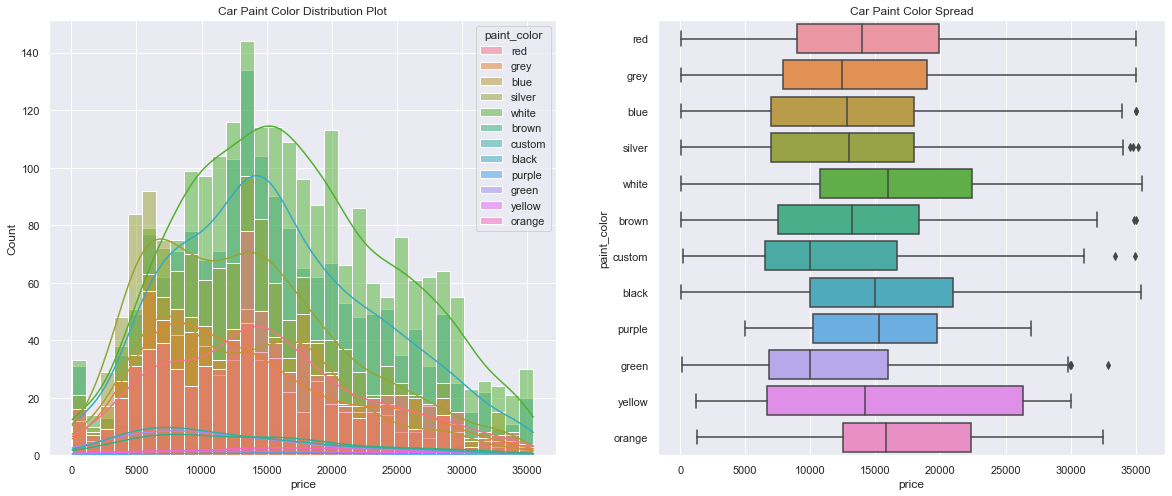

In [46]:
plt.figure(figsize=(20,8))
plt.title('Car Paint Color')
ax = sns.countplot(data=df, x="paint_color")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Paint Color Distribution Plot')
sns.histplot(data= df, x='price', hue='paint_color', kde=True)

plt.subplot(1,2,2)
plt.title('Car Paint Color Spread')
sns.boxplot(data= df, x='price', y= 'paint_color')

plt.show()

# Size

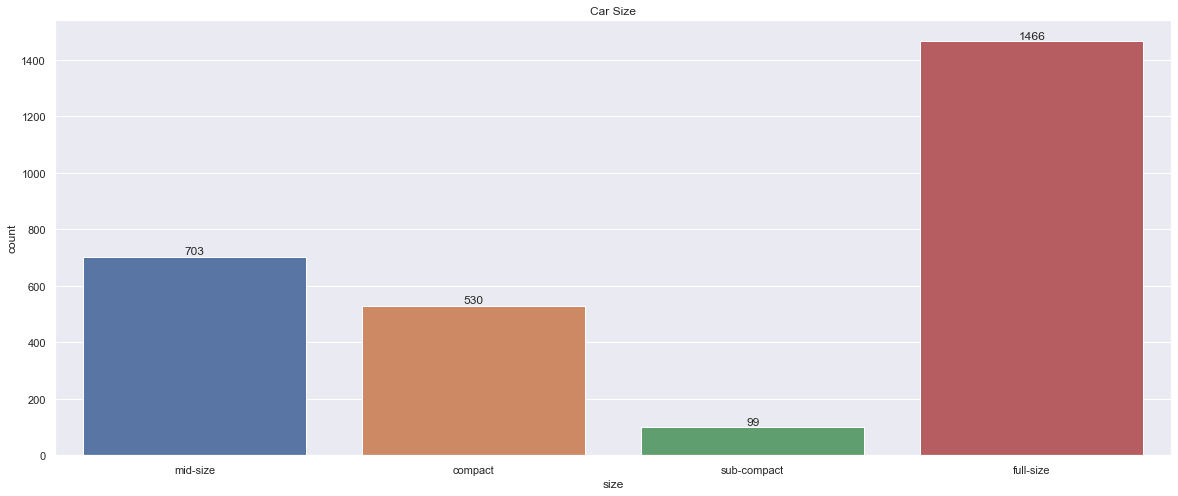

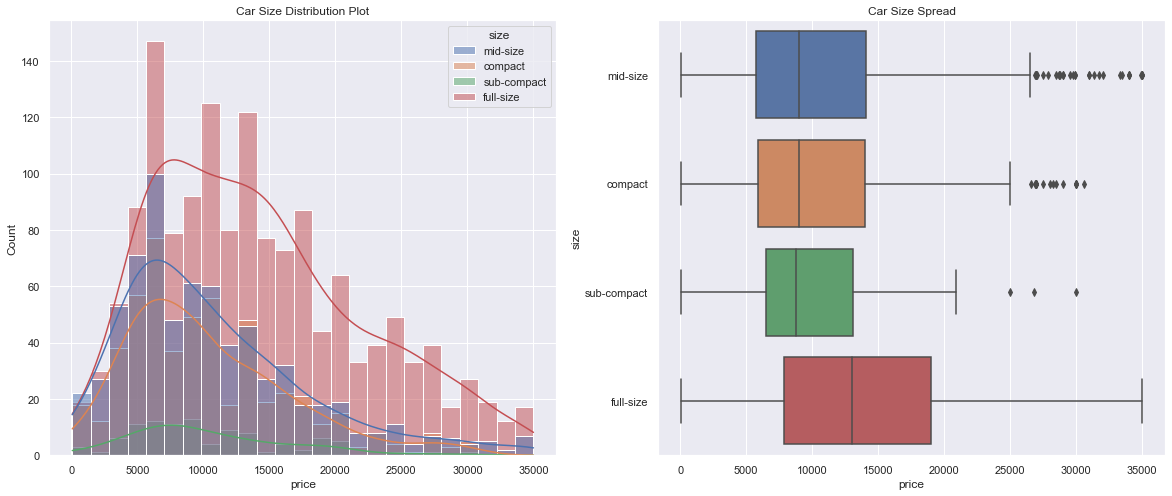

In [47]:
plt.figure(figsize=(20,8))
plt.title('Car Size')
ax = sns.countplot(data=df, x="size")
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Size Distribution Plot')
sns.histplot(data= df, x='price', hue='size', kde=True)

plt.subplot(1,2,2)
plt.title('Car Size Spread')
sns.boxplot(data= df, x='price', y= 'size')

plt.show()

# Long - Lat

In [48]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['long'],
        lat = df['lat'],
        mode = 'markers',
        marker = dict(
            opacity = 0.8,
            autocolorscale = False,
            colorscale = 'Blues',
            cmin = 0,
            color = df['price'],
            cmax = df['price'].max(),
            colorbar_title="Car Price"
        )))

fig.update_layout(
        title = 'Car Price',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

# Data Model

In [49]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'description', 'county', 'lat',
       'long', 'State', 'Number of Crashes', 'Poverty'],
      dtype='object')

In [50]:
df_model = df[['price', 'odometer', 'year', 'long', 'lat', 
               'condition', 'transmission', 'drive', 'type', 'fuel', 'cylinders', 'size']]
df_model.head()

price  odometer    year      long      lat  condition transmission drive  \
2    9997  125666.0  2011.0  -73.0058  40.8004  excellent    automatic   NaN   
3   21504   24218.0  2017.0 -101.7940  35.1773        NaN    automatic   fwd   
8    8800   54328.0  2012.0 -122.3440  47.7227        NaN    automatic   NaN   
10  14899  107171.0  2017.0  -94.3665  38.6716        NaN    automatic   fwd   
14   6200  101723.0  2006.0  -80.0880  26.6493  excellent    automatic   NaN   

        type fuel    cylinders      size  
2        NaN  gas          NaN       NaN  
3      sedan  gas  4 cylinders  mid-size  
8      sedan  gas          NaN   compact  
10  mini-van  gas  6 cylinders       NaN  
14       NaN  gas          NaN       NaN

In [51]:
df_model = pd.get_dummies(df_model, 
                          drop_first = True,
                          columns = ['condition', 'transmission', 'drive', 'type', 'fuel', 'cylinders', 'size'],
                          prefix=['condition', 'transmission', 'drive', 'type', 'fuel', 'cylinders', 'size']
                         )
df_model.head()

price  odometer    year      long      lat  condition_fair - salvage  \
2    9997  125666.0  2011.0  -73.0058  40.8004                         0   
3   21504   24218.0  2017.0 -101.7940  35.1773                         0   
8    8800   54328.0  2012.0 -122.3440  47.7227                         0   
10  14899  107171.0  2017.0  -94.3665  38.6716                         0   
14   6200  101723.0  2006.0  -80.0880  26.6493                         0   

    condition_good  condition_like new - new  transmission_manual  \
2                0                         0                    0   
3                0                         0                    0   
8                0                         0                    0   
10               0                         0                    0   
14               0                         0                    0   

    transmission_other  ...  fuel_other  cylinders_3 cylinders  \
2                    0  ...           0                      0   
3                    0  ...           0                      0   
8                    0  ...           0                      0   
10                   0  ...           0                      0   
14                   0  ...           0                      0   

    cylinders_4 cylinders  cylinders_5 cylinders  cylinders_6 cylinders  \
2                       0                      0                      0   
3                       1                      0                      0   
8                       0                      0                      0   
10                      0                      0                      1   
14                      0                      0                      0   

    cylinders_8 cylinders  cylinders_other  size_full-size  size_mid-size  \
2                       0                0               0              0   
3                       0                0               0              1   
8                       0                0               0              0   
10                      0                0               0              0   
14                      0                0               0              0   

    size_sub-compact  
2                  0  
3                  0  
8                  0  
10                 0  
14                 0  

[5 rows x 35 columns]

In [52]:
df_model.columns

Index(['price', 'odometer', 'year', 'long', 'lat', 'condition_fair - salvage',
       'condition_good', 'condition_like new - new', 'transmission_manual',
       'transmission_other', 'drive_fwd', 'drive_rwd', 'type_convertible',
       'type_coupe', 'type_hatchback', 'type_mini-van', 'type_other',
       'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon',
       'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other',
       'cylinders_3 cylinders', 'cylinders_4 cylinders',
       'cylinders_5 cylinders', 'cylinders_6 cylinders',
       'cylinders_8 cylinders', 'cylinders_other', 'size_full-size',
       'size_mid-size', 'size_sub-compact'],
      dtype='object')

In [53]:
df_model.dropna(inplace=True)

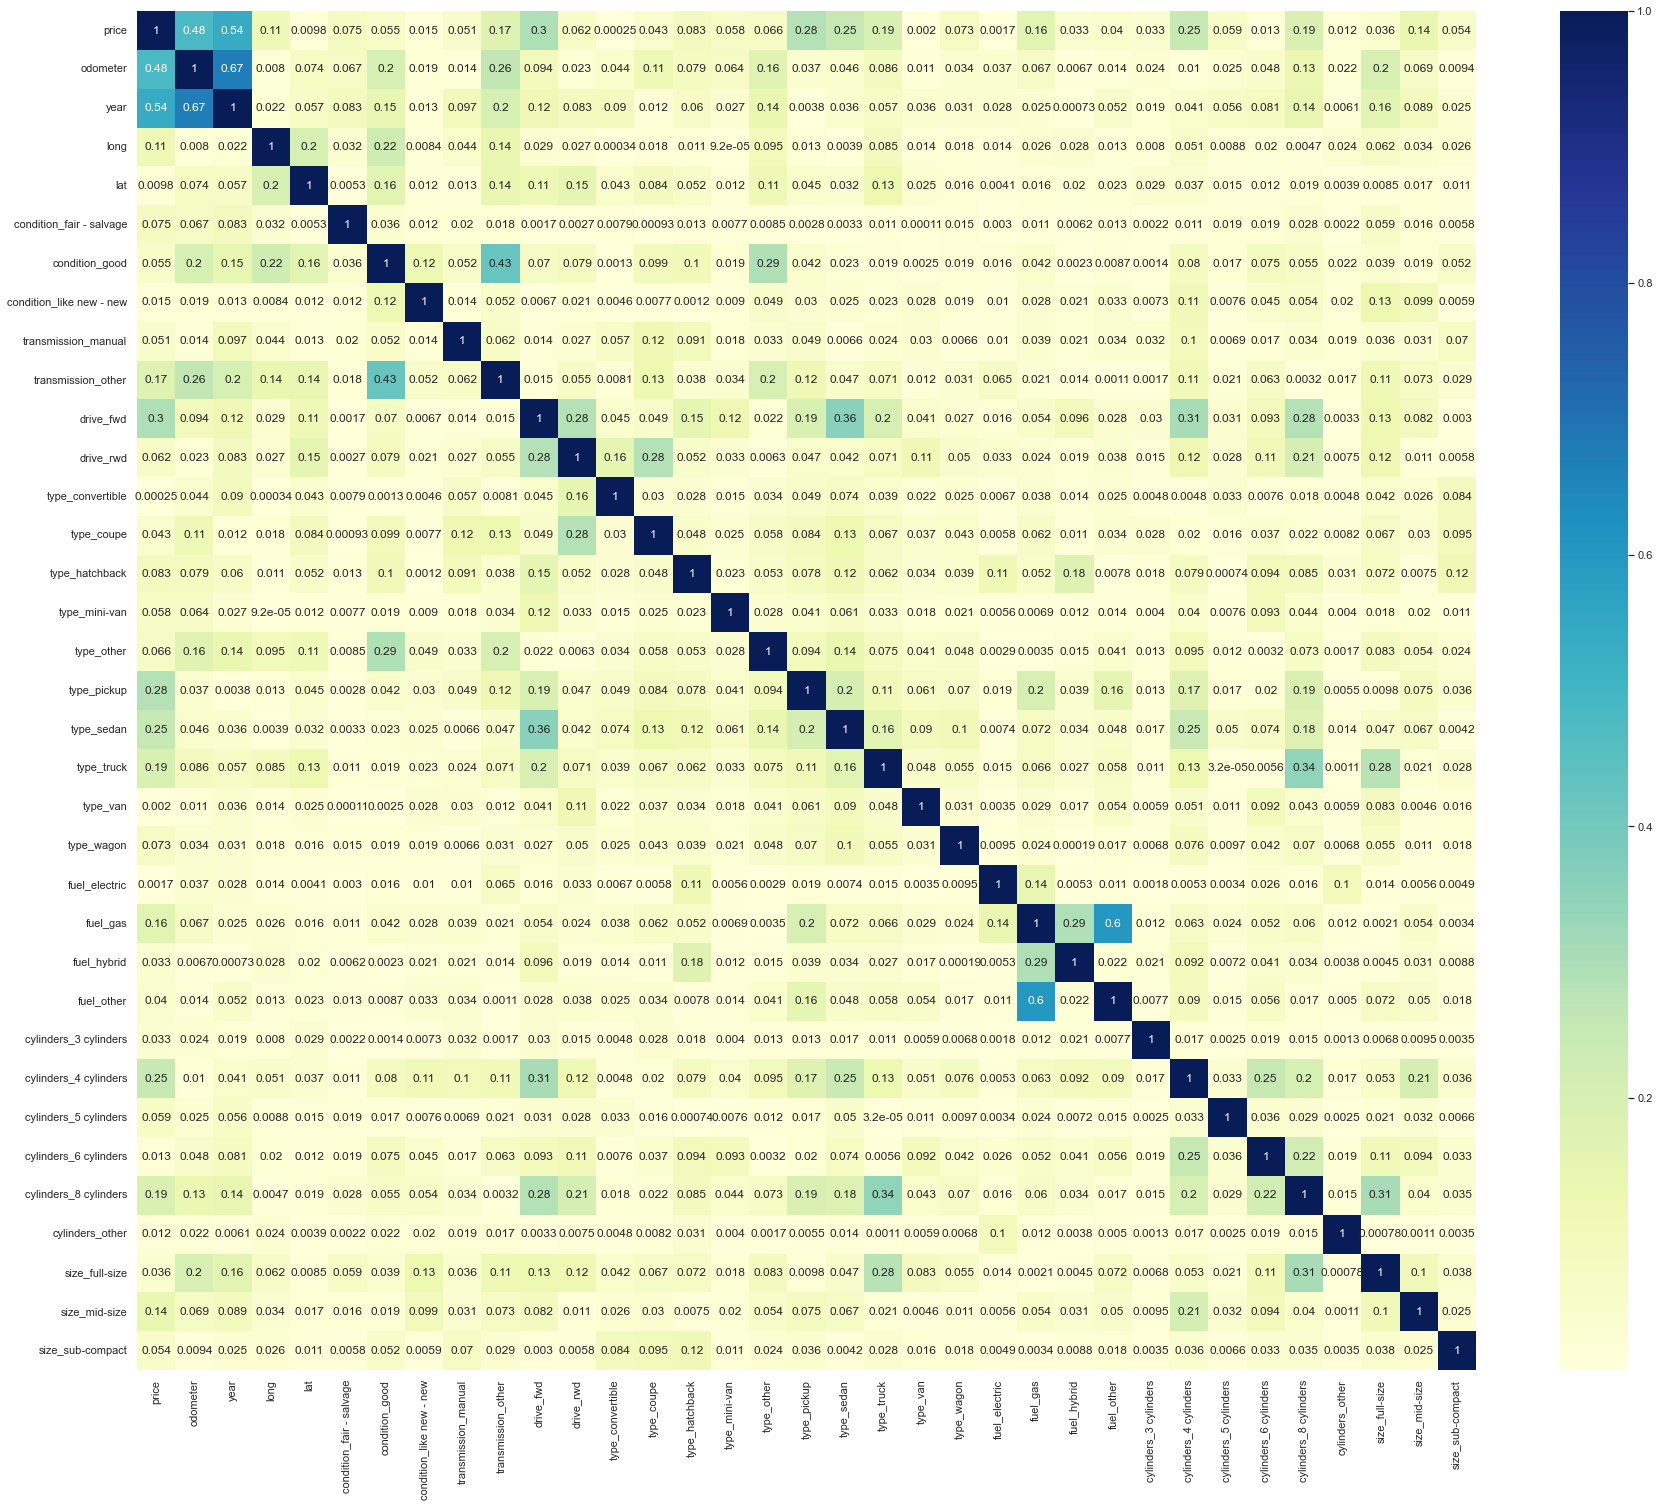

In [54]:
plt.figure(figsize = (30, 25))
sns.heatmap(abs(df_model.corr()), annot = True, cmap="YlGnBu")
plt.show()

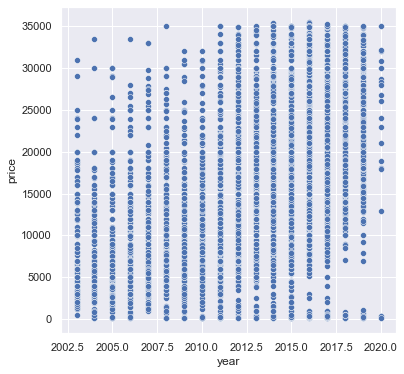

In [55]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_model, x="year", y="price")
plt.show()

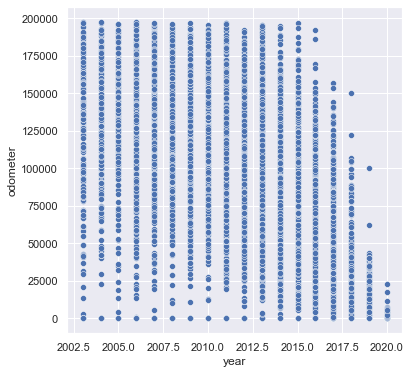

In [56]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_model, x="year", y="odometer")
plt.show()

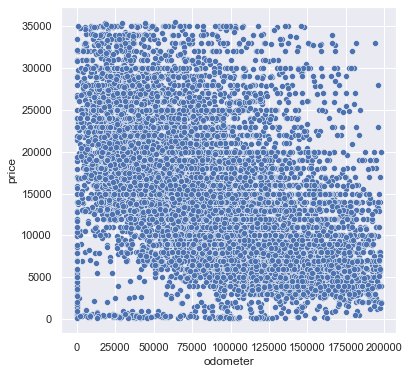

In [57]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_model, x="odometer", y="price")
plt.show()

In [58]:
df_model.to_pickle("./data/model.pkl")  

In [59]:
len(df_model)

10717

In [60]:
len(df_model.columns)

35